In [1027]:
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
import math

In [1028]:
def generateSamples():
    class1 = []
    for i in range(100):
        class1.append(([np.random.normal(3, 0.5), np.random.normal(0, 0.5)], [1, -1]))

    class2 = []
    for i in range(100):
        class2.append(([np.random.normal(0, 0.5), np.random.normal(0, 0.5)], [-1, 1]))
        
    class3 = []
    
    
    circleR = 6
    circleX = 1.5
    circleY = 0

    while True:
        alpha = 2 * math.pi * random.random()
        r = circleR * math.sqrt(random.random())
        x = r * math.cos(alpha) + circleX
        y = r * math.sin(alpha) + circleY
        
        if pow(x - 1.5, 2) + pow(y, 2) >= 16:
            class3.append(([x, y], [-1, -1]))
            
        if len(class3) == 250:
            break
    
    data = class1 + class2 + class3
    random.shuffle(data)
        
    return data, class1, class2, class3

In [1029]:
def adalineNeuron(X, W, b):
    net = np.sum(np.multiply(X, W)) + b
    if net >= 0:
        return 1, net
    else:
        return -1, net
    
def network(X, W, b):
    h = []
    net = []
    y = []
    ynet = []

    hTemp, netTemp = adalineNeuron(X[0], W[0], b[0])
    h.append(hTemp)
    net.append(netTemp)
    hTemp, netTemp = adalineNeuron(X[0], W[1], b[1])
    h.append(hTemp)
    net.append(netTemp)
    hTemp, netTemp = adalineNeuron(X[0], W[2], b[2])
    h.append(hTemp)
    net.append(netTemp)
    hTemp, netTemp = adalineNeuron(X[0], W[3], b[3])
    h.append(hTemp)
    net.append(netTemp)
    hTemp, netTemp = adalineNeuron(X[0], W[4], b[4])
    h.append(hTemp)
    net.append(netTemp)
    hTemp, netTemp = adalineNeuron(X[0], W[5], b[5])
    h.append(hTemp)
    net.append(netTemp)
    hTemp, netTemp = adalineNeuron(X[0], W[6], b[6])
    h.append(hTemp)
    net.append(netTemp)
    hTemp, netTemp = adalineNeuron(X[0], W[7], b[7])
    h.append(hTemp)
    net.append(netTemp)
    
    hTemp, netTemp = adalineNeuron([h[0], h[1], h[2], h[3]], [1, 1, 1, 1], -3.5)
    y.append(hTemp)
    ynet.append(netTemp)
    hTemp, netTemp = adalineNeuron([h[4], h[5], h[6], h[7]], [1, 1, 1, 1], -3.5)
    y.append(hTemp)
    ynet.append(netTemp)
    
    return h, net, y, ynet

In [1030]:
def train(data):
    W = [[np.random.uniform(-0.005, .005), np.random.uniform(-0.005, .005)], [np.random.uniform(-0.005, .005), np.random.uniform(-0.005, .005)], [np.random.uniform(-0.005, .005), np.random.uniform(-0.005, .005)], [np.random.uniform(-0.005, .005), np.random.uniform(-0.005, .005)], [np.random.uniform(-0.005, .005), np.random.uniform(-0.005, .005)], [np.random.uniform(-0.005, .005), np.random.uniform(-0.005, .005)], [np.random.uniform(-0.005, .005), np.random.uniform(-0.005, .005)], [np.random.uniform(-0.005, .005), np.random.uniform(-0.005, .005)]]
    b = [np.random.uniform(-0.005, .005), np.random.uniform(-0.005, .005), np.random.uniform(-0.005, .005), np.random.uniform(-0.005, .005), np.random.uniform(-0.005, .005), np.random.uniform(-0.005, .005), np.random.uniform(-0.005, .005), np.random.uniform(-0.005, .005)]

    endThreshold = .5
    
    costs = []
    
    epoch = 1
    for ep in range(200):
        cost = 0
        for datum in data:
            h, net, y, ynet = network(datum, W, b)
            target = datum[1]
            
            for outIdx in range(2):
                if target[outIdx] != y[outIdx]:
                    if outIdx == 0:
                        neuronNet = net[:4]
                    else:
                        neuronNet = net[4:8]
                        
                    if target[outIdx] == 1:
                        absoluteNet = [abs(ele) for ele in neuronNet]
                        indexes = [absoluteNet.index(min(absoluteNet))]
                    else:
                        indexes = []
                        for idx, ele in enumerate(neuronNet):
                            if ele > 0:
                                indexes.append(idx)
                        
                    if outIdx == 1:
                        indexes = [x+4 for x in indexes]

                    if target == [1, -1]:
                        neuronTargets = [1, 1, 1, 1, -1, -1, -1, -1]
                    elif target == [-1, 1]:
                        neuronTargets = [-1, -1, -1, -1, 1, 1, 1, 1]
                    else:
                        neuronTargets = [-1, -1, -1, -1, -1, -1, -1, -1]


                    for index in indexes:
#                         print(index)
                        error = neuronTargets[index] - net[index]
                        cost += pow(error, 2) / 2

                        for i in range(len(W[0])):
                            W[index][i] = W[index][i] + lr * (error) * datum[0][i]

                        b[index] = b[index] + lr * (error)
                
        costs.append(cost)
        
        print('Epoch ' + str(epoch) + ': Cost: ' + str(cost))
    
        if cost < endThreshold:
            break;
                
        epoch += 1
        
    return W, b, costs

In [1032]:
samples, class1, class2, class3 = generateSamples()
W, b, costs = train(samples)

print()
print('Final Weights: ' + str(W))
print('Final Bias: ' + str(b))

Epoch 1: Cost: 88.93455763395264
Epoch 2: Cost: 84.97378765714829
Epoch 3: Cost: 89.71535539643865
Epoch 4: Cost: 91.76745479608422
Epoch 5: Cost: 112.60096976160703
Epoch 6: Cost: 83.60457954579091
Epoch 7: Cost: 67.8699347203257
Epoch 8: Cost: 50.763279451789636
Epoch 9: Cost: 47.65282659250261
Epoch 10: Cost: 44.64668590166784
Epoch 11: Cost: 40.57650515516206
Epoch 12: Cost: 42.09589358707414
Epoch 13: Cost: 30.536147349530143
Epoch 14: Cost: 17.520213843423612
Epoch 15: Cost: 16.061970555061627
Epoch 16: Cost: 11.512318484906194
Epoch 17: Cost: 13.017597660118101
Epoch 18: Cost: 10.010517407735032
Epoch 19: Cost: 14.057036662906992
Epoch 20: Cost: 10.010568570935497
Epoch 21: Cost: 11.015614884762691
Epoch 22: Cost: 12.515345216658668
Epoch 23: Cost: 9.509040157733375
Epoch 24: Cost: 10.014575335344178
Epoch 25: Cost: 8.008224349518995
Epoch 26: Cost: 7.508271210379306
Epoch 27: Cost: 13.5526230115385
Epoch 28: Cost: 8.50801988479623
Epoch 29: Cost: 7.5079333065029825
Epoch 30: Co

y = 0.0003136693806467488x +-0.0004816051231561674/0.0002316626731256603
y = -0.0005824770832969131x +0.0027070691447044445/-0.00028592562296485074
y = 0.0004389062148938995x +0.001172741312086602/-0.0016379630769661193
y = -0.0008270248752141977x +0.005849507694671382/0.0026683307427606
y = 0.0018501190102437077x +0.0032605421207670695/0.0013394544688103583
y = -0.0007411801654014762x +0.0028371958014132437/-0.0018584754360198232
y = 0.0016623428273752894x +0.003994769152971083/-0.003523676731516455
y = -0.002996209336989851x +0.0036852665262425894/-0.0005087913589889991


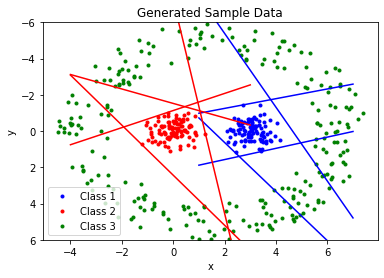

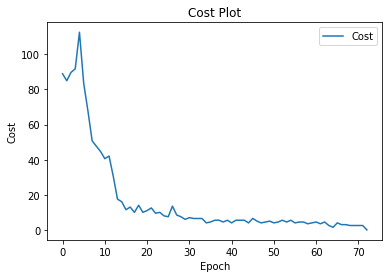

In [1034]:
x = []
y = []
for sample in class1:
    x.append(sample[0][0])
    y.append(sample[0][1]) 

plt.scatter(x, y, label="Class 1", color="blue", marker= ".")

x = []
y = []
for sample in class2:
    x.append(sample[0][0])
    y.append(sample[0][1]) 

plt.scatter(x, y, label="Class 2", color="red", marker= ".")


x = []
y = []
for sample in class3:
    x.append(sample[0][0])
    y.append(sample[0][1]) 

plt.scatter(x, y, label="Class 3", color="green", marker= ".")

for i in range(8):
    if i <= 3:
        color = 'blue'
        x = np.linspace(1,7,100)
    else:
        color = 'red'
        x = np.linspace(-4,3,100)
    y = (W[i][0] * x + b[i]) / -W[i][1]
    print('y = ' + str(W[i][0]) + 'x +' + str(b[i]) + '/' + str(-W[i][1]))
    plt.plot(x, y, color=color)

 
plt.xlabel('x')
plt.ylabel('y')
plt.title('Generated Sample Data')
plt.ylim([6, -6])
plt.legend()
plt.show()



plt.plot(range(len(costs)), costs, label = "Cost")
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.title('Cost Plot')
plt.legend()
plt.show()